In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data from file
data = pd.read_csv('/Users/hamza/Downloads/Pythonfinal.csv')

# Create empty graph
G = nx.Graph()

# Add nodes for users
users = list(set(data['author']))
for user in users:
    G.add_node(user)

# Add edges for user-to-user relationships
for parent_id in set(data['parent_id']):
    comments_for_parent = data[data['parent_id'] == parent_id]['id']
    users_for_parent = data[data['parent_id'] == parent_id]['author']
    for user1 in users_for_parent:
        for user2 in users_for_parent:
            if user1 != user2:
                G.add_edge(user1, user2)

# Write nodes to CSV
with open('output_nodes1.csv', 'w') as f:
    f.write('id,type\n')
    for node in G.nodes():
        f.write(f"{node},user\n")

# Write edges to CSV
with open('output_edges1.csv', 'w') as f:
    f.write('source,target,type\n')
    for edge in G.edges(data=True):
        source = edge[0]
        target = edge[1]
        edge_type = ''
        f.write(f"{source},{target},{edge_type}\n")


In [15]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS

# Load the data
data = pd.read_csv('/Users/hamza/Downloads/Topic_modelling.csv')['body'].tolist()

# Tokenize the text and remove stop words
tokens = [[token for token in gensim.utils.simple_preprocess(doc) if token not in STOPWORDS] for doc in data]

# Create a dictionary of the tokens
dictionary = corpora.Dictionary(tokens)

# Create a bag-of-words representation
corpus = [dictionary.doc2bow(doc) for doc in tokens]

# Run the topic model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10, alpha='auto', eta='auto')

# Print the top words for each topic
topics = lda_model.print_topics(num_topics=10, num_words=10)
for topic in topics:
    print(topic)

# Get the topic distribution for each document in the corpus
topic_distribution = [lda_model.get_document_topics(doc) for doc in corpus]


(0, '0.016*"huge" + 0.016*"mean" + 0.016*"japanese" + 0.009*"repeatedly" + 0.009*"modal" + 0.009*"broadcast" + 0.009*"pop" + 0.009*"page" + 0.009*"failed" + 0.009*"try"')
(1, '0.015*"going" + 0.015*"different" + 0.011*"like" + 0.010*"win" + 0.010*"narrative" + 0.010*"elden" + 0.010*"ring" + 0.010*"awards" + 0.010*"sets" + 0.010*"happy"')
(2, '0.017*"game" + 0.017*"steam" + 0.012*"people" + 0.012*"trailers" + 0.012*"names" + 0.012*"weird" + 0.012*"like" + 0.012*"let" + 0.012*"bots" + 0.006*"better"')
(3, '0.031*"think" + 0.016*"game" + 0.011*"games" + 0.011*"said" + 0.011*"starfield" + 0.011*"missions" + 0.011*"mech" + 0.011*"category" + 0.011*"wasn" + 0.011*"pretty"')
(4, '0.034*"game" + 0.017*"year" + 0.017*"like" + 0.017*"new" + 0.012*"loved" + 0.012*"thought" + 0.012*"games" + 0.012*"nominated" + 0.012*"eh" + 0.006*"fun"')
(5, '0.018*"year" + 0.014*"terrible" + 0.014*"idea" + 0.014*"game" + 0.014*"ring" + 0.014*"elden" + 0.009*"like" + 0.009*"gameplay" + 0.009*"incredibly" + 0.009*"

In [37]:
!pip install pyLDAvis
import pandas as pd
import gensim
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
import warnings
import string
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora, matutils, models
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.models import Phrases
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /Users/hamza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:


# Load the data
data = pd.read_csv('/Users/hamza/Downloads/Topic_modelling.csv')['body'].tolist()

# Tokenize the text, remove stop words and URLs
tokens = []
for doc in data:
    # Remove URLs
    doc = re.sub(r'http\S+', '', doc)
    doc = re.sub(r'www\S+', '', doc)
    
    # Tokenize and remove stop words
    tokens.append([token for token in gensim.utils.simple_preprocess(doc) if token not in STOPWORDS])

# Create a dictionary of the tokens
dictionary = corpora.Dictionary(tokens)

# Create a bag-of-words representation
corpus = [dictionary.doc2bow(doc) for doc in tokens]

# Run the topic model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10, alpha='auto', eta='auto')

# Print the top words for each topic
topics = lda_model.print_topics(num_topics=10, num_words=10)
for topic in topics:
    print(topic)

# Get the topic distribution for each document in the corpus
topic_distribution = [lda_model.get_document_topics(doc) for doc in corpus]


(0, '0.014*"gameplay" + 0.014*"deserved" + 0.014*"great" + 0.014*"hades" + 0.007*"hellslinger" + 0.007*"compare" + 0.007*"stuff" + 0.007*"oscars" + 0.007*"incredibly" + 0.007*"surprised"')
(1, '0.016*"different" + 0.016*"honestly" + 0.016*"like" + 0.016*"japanese" + 0.016*"play" + 0.008*"doubt" + 0.008*"acquisition" + 0.008*"exclusive" + 0.008*"want" + 0.008*"easily"')
(2, '0.017*"year" + 0.017*"gameplay" + 0.017*"arcane" + 0.009*"page" + 0.009*"try" + 0.009*"mario" + 0.009*"easily" + 0.009*"edgerunners" + 0.009*"failed" + 0.009*"big"')
(3, '0.023*"ring" + 0.023*"elden" + 0.018*"game" + 0.018*"narrative" + 0.018*"new" + 0.012*"weird" + 0.012*"ask" + 0.012*"year" + 0.012*"accessibility" + 0.012*"hardly"')
(4, '0.021*"people" + 0.016*"going" + 0.016*"like" + 0.011*"ring" + 0.011*"sets" + 0.011*"elden" + 0.011*"game" + 0.011*"way" + 0.011*"awards" + 0.011*"starfield"')
(5, '0.014*"lot" + 0.014*"mean" + 0.010*"instead" + 0.010*"shitshow" + 0.010*"spent" + 0.010*"lol" + 0.010*"lore" + 0.010

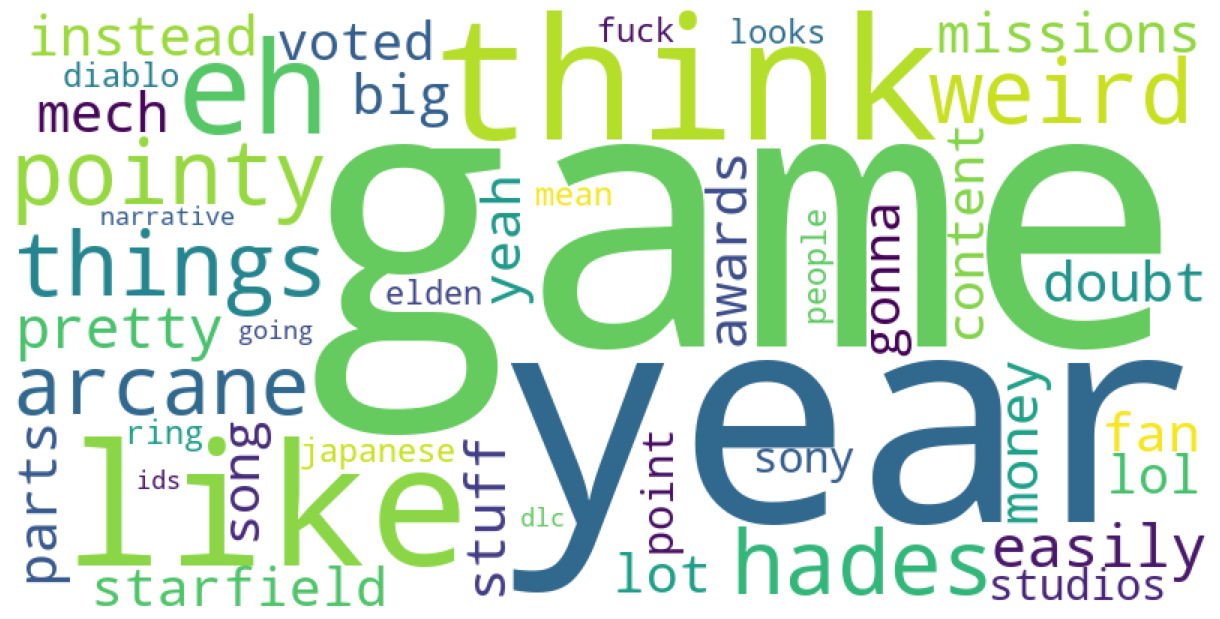

In [10]:


# Load the data
data = pd.read_csv('/Users/hamza/Downloads/Topic_modelling.csv')['body'].tolist()

# Tokenize the text, remove stop words and URLs
tokens = []
for doc in data:
    # Remove URLs
    doc = re.sub(r'http\S+', '', doc)
    doc = re.sub(r'www\S+', '', doc)
    
    # Tokenize and remove stop words
    tokens.append([token for token in gensim.utils.simple_preprocess(doc) if token not in STOPWORDS])

# Create a dictionary of the tokens
dictionary = corpora.Dictionary(tokens)

# Create a bag-of-words representation
corpus = [dictionary.doc2bow(doc) for doc in tokens]

# Run the topic model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10, alpha='auto', eta='auto')

# Get the top words for each topic
topics = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)

# Combine all the words from each topic
all_words = []
for topic in topics:
    words = [word[0] for word in topic[1]]
    all_words.extend(words)

# Create a word cloud of all the words
text = ' '.join(all_words)
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


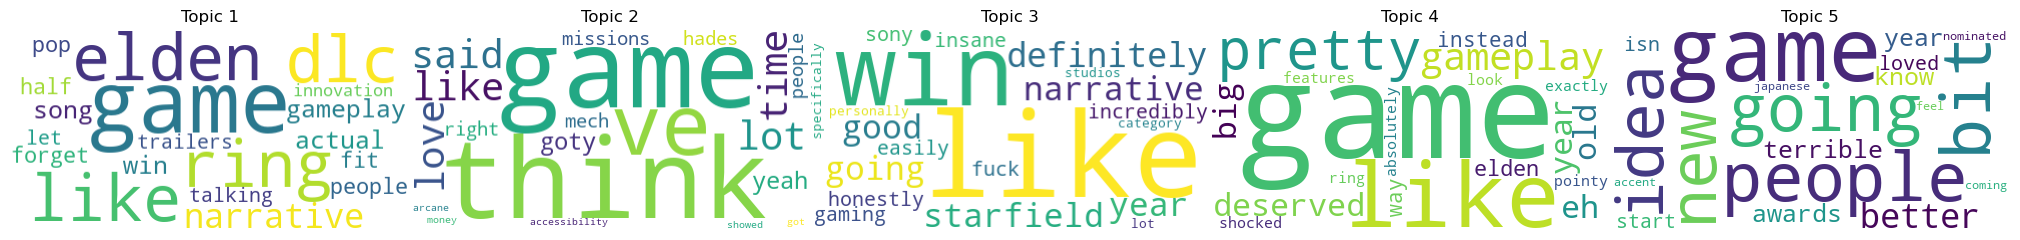

In [14]:


# Load the data
data = pd.read_csv('/Users/hamza/Downloads/Topic_modelling.csv')['body'].tolist()

# Tokenize the text, remove stop words and URLs
tokens = []
for doc in data:
    # Remove URLs
    doc = re.sub(r'http\S+', '', doc)
    doc = re.sub(r'www\S+', '', doc)
    
    # Tokenize and remove stop words
    tokens.append([token for token in gensim.utils.simple_preprocess(doc) if token not in STOPWORDS])

# Create a dictionary of the tokens
dictionary = corpora.Dictionary(tokens)

# Create a bag-of-words representation
corpus = [dictionary.doc2bow(doc) for doc in tokens]

# Run a topic model with 5 topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10, alpha='auto', eta='auto')

# Get the top words for each topic
topics = lda_model.show_topics(num_topics=5, num_words=20, formatted=False)

# Create a word cloud for each topic
wordclouds = []
for i, topic in enumerate(topics):
    words = [word[0] for word in topic[1]]
    text = ' '.join(words)
    wordcloud = WordCloud(width=400, height=200, stopwords=STOPWORDS, background_color='white').generate(text)
    wordclouds.append(wordcloud)

# Display the word clouds together
fig, axs = plt.subplots(1, 5, figsize=(20, 10))
for i, ax in enumerate(axs):
    ax.imshow(wordclouds[i])
    ax.set_title(f"Topic {i+1}")
    ax.axis("off")
plt.tight_layout(pad=0)
plt.show()


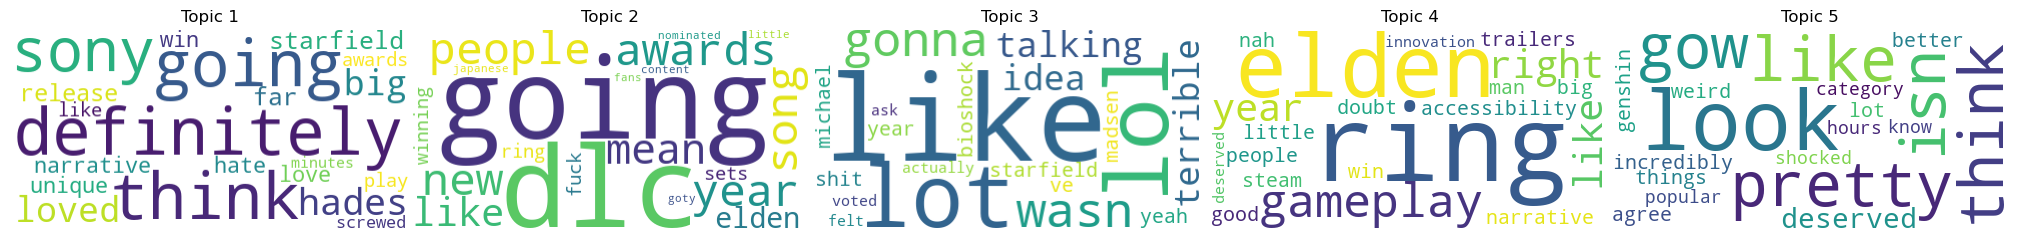

In [18]:

# Load the data
data = pd.read_csv('/Users/hamza/Downloads/Topic_modelling.csv')['body'].tolist()

# Add custom stopwords
custom_stopwords = {'game', 'said', 'thing', 'games'}
STOPWORDS = STOPWORDS.union(custom_stopwords)

# Tokenize the text, remove stop words and URLs
tokens = []
for doc in data:
    # Remove URLs
    doc = re.sub(r'http\S+', '', doc)
    doc = re.sub(r'www\S+', '', doc)
    
    # Tokenize and remove stop words
    tokens.append([token for token in gensim.utils.simple_preprocess(doc) if token not in STOPWORDS])

# Create a dictionary of the tokens
dictionary = corpora.Dictionary(tokens)

# Create a bag-of-words representation
corpus = [dictionary.doc2bow(doc) for doc in tokens]

# Run a topic model with 5 topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10, alpha='auto', eta='auto')

# Get the top words for each topic
topics = lda_model.show_topics(num_topics=5, num_words=20, formatted=False)

# Create a word cloud for each topic
wordclouds = []
for i, topic in enumerate(topics):
    words = [word[0] for word in topic[1]]
    text = ' '.join(words)
    wordcloud = WordCloud(width=400, height=200, stopwords=STOPWORDS, background_color='white').generate(text)
    wordclouds.append(wordcloud)

# Display the word clouds together
fig, axs = plt.subplots(1, 5, figsize=(20, 10))
for i, ax in enumerate(axs):
    ax.imshow(wordclouds[i])
    ax.set_title(f"Topic {i+1}")
    ax.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [17]:
# Load the dataset
df = pd.read_csv('/Users/hamza/Downloads/Topic_modelling.csv')

# Define stopwords, custom words, and URL regex
stop_words = set(stopwords.words('english'))
custom_words = ['game', 'games']
url_regex = re.compile(r'https?://\S+')

# Define preprocess function to clean text
def preprocess(text):
    text = url_regex.sub('', text)  # Remove URLs
    tokens = word_tokenize(text.lower())  # Tokenize text
    tokens = [token for token in tokens if token not in stop_words and token not in custom_words and len(token) > 2]  # Remove stopwords and custom words, and keep tokens with a length > 2
    lemmatizer = nltk.WordNetLemmatizer()  # Initialize lemmatizer
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize tokens
    return tokens

# Preprocess text in dataframe and create token column
df['tokens'] = df['body'].apply(preprocess)

# Convert tokenized documents to a Gensim corpus
from gensim import corpora
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]

# Build the LDA model
num_topics = 5
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

# Visualize the results using pyLDAvis
import pyLDAvis.gensim_models as gensimvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Coherence Score: 0.5255101303969555


In [31]:

# Load data
data = pd.read_csv('/Users/hamza/Downloads/Topic_modelling.csv')

# Remove URLs
data['body'] = data['body'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove punctuation
data['body'] = data['body'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Tokenize
data['body'] = data.apply(lambda row: nltk.word_tokenize(row['body']), axis=1)

# Lowercase
data['body'] = data['body'].apply(lambda x: [word.lower() for word in x])

# Remove stop words and custom words
stop_words = set(stopwords.words('english'))
custom_words = ['amp', 'rt']
stop_words = stop_words.union(custom_words)
data['body'] = data['body'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatize
lemmatizer = WordNetLemmatizer()
data['body'] = data['body'].apply(lambda x: [lemmatizer.lemmatize(word, 'v') for word in x])

# Create document-term matrix
texts = data['body'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Create Gensim LDA model
num_topics = 4
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42, passes=10)

# Evaluate the model using coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='u_mass').get_coherence()

print('Coherence Score:', coherence_model_lda)

# Visualize the topics
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(lda_model, corpus, dictionary)
panel

# Print the top 10 words for each topic
topic_words = {}
for topic in range(num_topics):
    topic_terms = lda_model.get_topic_terms(topic, topn=10)
    topic_words[topic] = [dictionary.get(term_id) for term_id, _ in topic_terms]
    print('Topic {}: {}'.format(topic, ' '.join(topic_words[topic])))


Coherence Score: -16.323168002805506
Topic 0: ’ game think lot award idea mean win go definitely
Topic 1: ’ like show gameplay first something things award nah ring
Topic 2: game get go people show didnt say like start much
Topic 3: game like one starfield gon na ’ yeah shit call


In [34]:


# Load data
data = pd.read_csv('/Users/hamza/Downloads/Topic_modelling.csv')

# Remove URLs
data['body'] = data['body'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove punctuation
data['body'] = data['body'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Tokenize and create bigrams
bigram = models.Phrases(data['body'], min_count=5, threshold=100)
data['body'] = data.apply(lambda row: bigram[row['body']], axis=1)
data['body'] = data.apply(lambda row: [word for word in row['body'] if '_' not in word], axis=1) # Remove any bigram that contains '_'

# Lowercase
data['body'] = data['body'].apply(lambda x: [word.lower() for word in x])

# Remove stop words and custom words
stop_words = set(stopwords.words('english'))
custom_words = ['amp', 'rt']
stop_words = stop_words.union(custom_words)
data['body'] = data['body'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatize
lemmatizer = WordNetLemmatizer()
data['body'] = data['body'].apply(lambda x: [lemmatizer.lemmatize(word, 'v') for word in x])

# Create document-term matrix
texts = data['body'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Create Gensim LDA model
num_topics = 4
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42, passes=10)

# Evaluate the model using coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='u_mass').get_coherence()

print('Coherence Score:', coherence_model_lda)

# Visualize the topics
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(lda_model, corpus, dictionary)
panel

# Print the top 10 words for each topic
topic_words = {}
for topic in range(num_topics):
    topic_terms = lda_model.get_topic_terms(topic, topn=10)
    topic_words[topic] = [dictionary.get(term_id) for term_id, _ in topic_terms]
    print('Topic {}: {}'.format(topic, ' '.join(topic_words[topic])))


Coherence Score: -4.466006738434288
Topic 0:   n e l g w h c f r
Topic 1:   e n h l r u c b p
Topic 2: 🧑 🚀 ‍ ☀ ️ 🌍 🔫   e n
Topic 3:   e r n h g l u v f


In [36]:


# Load data
data = pd.read_csv('/Users/hamza/Downloads/Topic_modelling.csv')

# Remove URLs
data['body'] = data['body'].apply(lambda x: re.sub(r'http\S+', '', x))

print(data['body'].head())

0    Judas for me...felt like i've been waiting for...
1    It's a typical Bethesda thing to concentrate t...
2    I'm a little envious of franchises like that a...
3    You got a pretty amazing 100+ hours to look fo...
4              Witcher 4 is coming first though right?
Name: body, dtype: object


In [29]:


# Load data
data = pd.read_csv('/Users/hamza/Downloads/TopicModellingtry.csv')

# Remove URLs
data['body'] = data['body'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove punctuation
data['body'] = data['body'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Tokenize
data['body'] = data['body'].apply(lambda x: word_tokenize(x))

# Create bigrams
bigram = Phrases(data['body'], min_count=5, threshold=100)
data['body'] = data['body'].apply(lambda x: bigram[x])

print(data['body'].head())


0    [gt, the, whole, purpose, of, live, events, is...
1    [Kid, snuck, in, with, the, Elden, Ring, peopl...
2    [Now, theyre, saying, that, people, are, sayin...
3    [Thats, subjective, though, same, as, why, the...
4    [They, toned, down, a, ton, of, themes, to, fi...
Name: body, dtype: object
